In [3]:
from sklearn import preprocessing 
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_digits
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

In [4]:
digit= load_digits()
x=digit.data
y=digit.target

In [5]:
x.shape, y.shape

((1797L, 64L), (1797L,))

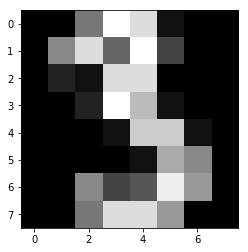

In [6]:
plt.imshow(x[3].reshape(8,8),cmap=plt.cm.gray)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
from sklearn import model_selection

In [9]:
(x_train,x_test,y_train,y_test)=train_test_split(x,y,test_size=0.3,random_state=42)

In [10]:
kfold=model_selection.KFold(n_splits=10,random_state=7)

In [11]:
model=LogisticRegression()

In [12]:
scoring='accuracy'

In [13]:
results=model_selection.cross_val_score(model,x,y,cv=kfold,scoring=scoring)

In [31]:
results

array([0.73184699, 0.86942354, 0.81023661, 0.79423609, 0.82434177,
       0.94343263, 0.92524112, 0.90725247, 0.60169024, 0.82555495])

# Classification accuracy

In [32]:
print("Accuracy: %.3f (%.3f)") %(results.mean(),results.std())

Accuracy: 0.823 (0.096)


# Logarithmic loss

In [16]:
results=model_selection.cross_val_score(model,x,y,cv=kfold,scoring='neg_log_loss')

In [33]:
print("Logloss: %.3f (%.3f)") %(results.mean(),results.std())

Logloss: 0.823 (0.096)


# Mean absolute error

In [18]:
results=model_selection.cross_val_score(model,x,y,cv=kfold,scoring='neg_mean_absolute_error')

In [34]:
print("Mean absolute error: %.3f (%.3f)") %(results.mean(),results.std())

Mean absolute error: 0.823 (0.096)


# Mean squared error

In [20]:
results=model_selection.cross_val_score(model,x,y,cv=kfold,scoring='neg_mean_squared_error')

In [43]:
print("Mean squared error: %.3f (%.3f)") %(results.mean(),results.std())

Mean squared error: 0.823 (0.096)


# Confusion matrix

In [39]:
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [40]:
predicted=model.predict(x_test)

In [41]:
matrix=confusion_matrix(y_test,predicted)

In [44]:
print(matrix)

[[52  0  0  0  1  0  0  0  0  0]
 [ 0 43  1  0  0  0  0  0  6  0]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  0 52  0  1  0  0  1  0]
 [ 0  1  0  0 59  0  0  0  0  0]
 [ 0  2  1  0  0 61  0  1  1  0]
 [ 0  0  0  0  0  1 52  0  0  0]
 [ 0  0  0  0  0  0  0 54  0  1]
 [ 0  1  0  0  0  1  0  0 41  0]
 [ 0  0  0  0  0  0  0  0  5 54]]


# Classification report

In [27]:
report=classification_report(y_test,predicted)

In [45]:
print(report)

             precision    recall  f1-score   support

          0       1.00      0.98      0.99        53
          1       0.91      0.86      0.89        50
          2       0.96      1.00      0.98        47
          3       1.00      0.96      0.98        54
          4       0.98      0.98      0.98        60
          5       0.95      0.92      0.94        66
          6       1.00      0.98      0.99        53
          7       0.98      0.98      0.98        55
          8       0.76      0.95      0.85        43
          9       0.98      0.92      0.95        59

avg / total       0.96      0.95      0.95       540



# R2 metrics

In [29]:
results=model_selection.cross_val_score(model,x,y,cv=kfold,scoring='r2')

In [30]:
print("R^2: %.3f (%.3f)") %(results.mean(),results.std())

R^2: 0.823 (0.096)
